# Principal Component Analysis (PCA) Applications

In this lab we will reduce the dimension of a problem by computing the problem's the principal components. This has applications in image compression, data visualization, and machine learning. Before start coding, we recommend that you read the A tutorial on Principal Components Analysis by Lindsay I Smith.

In the first part of this lab you will walkthrough an implementation of PCA on an artificial domain, where we will reduce the dimensionality of the problem from 4 to 2. Then, we will implement the similar algorithm to Image Data Compression.

## PART ONE: PCA on the Iris Problem

We will implement the PCA in the problem of classifying different species of iris based on features of their flowers. Each flower is described according to four different features: the width and length of both sepal and petal of the flower. 

The goal of this exercise is to apply PCA to the iris dataset and reduce its dimensionality from 4 to 2. PCA will discover a linear combination of the original 4 features that project the problem onto a 2D space while preserving as much of the variance of the dataset as possible. Once we we project the original dataset onto the lower dimensional space we will be able to visualize in 2D the distribution of the samples according to their species. 

This example illustrates the process one could use to better visualize a dataset or the process of generating a low-dimensional projection of a high-dimensional problem that will be better suited for training machine learning models. 

In [91]:
'''
Here we download the dataset and store it in a Pandas variable called 'dataset'. To learn more about Pandas,
see the following tutorial: https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
'''
import pandas as pd

dataset = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                    header=None,
                    sep=',')

# extracting features (sepal length, sepal width, petal length, petal width)
features = dataset.iloc[:, 0:4].values

# extracting the label of each sample
labels = dataset.iloc[:,4].values

Implement the PCA algorithm as shown in the artificial example for the Iris domain. For that, follow the steps.

1. Standardize the dataset
2. Compute the covariance matrix
3. Compute the eigenvectors and eigenvalues
4. Select the two eigenvectors associated with the largest eigenvalues
5. Create a matrix M whose columns are formed by the eigenvectors selected in (4)
6. Project the original dataset onto the lower dimensional space give by M
7. Plot the data in the 2-dimensional space given by the principal components. Make sure that samples with different labels have different colors in the plot. 

Observe the results and answer the question. Are you able to distinguish different species in the lower-dimensional space? 

In [92]:
dataset

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [93]:
## 1.Standardize the dataset
mean_x = np.mean(features.T,axis=1).reshape(4,1)
c_x = features.T - mean_x
print('Mean: ', mean_x.T)

std_x=np.std(c_x,axis=1).reshape(4,1)
print('Std. Dev.: ', std_x.T)
x = c_x
#/std_x

# 2&3.Compute the covariance matrix,  eigenvectors and eigenvalues
print(x.shape)
cov_x = np.cov(x)
print('covariance matrix:')
print(cov_x)
w, v = np.linalg.eig(cov_x)
print('eigenvalues: ')
print(w)
print('eigenvectors: ')
print(v)

Mean:  [[5.84333333 3.054      3.75866667 1.19866667]]
Std. Dev.:  [[0.82530129 0.43214658 1.75852918 0.76061262]]
(4, 150)
covariance matrix:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
eigenvalues: 
[4.22484077 0.24224357 0.07852391 0.02368303]
eigenvectors: 
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [94]:
# 4.Select the two eigenvectors associated with the largest eigenvalues
max_eigval_1=w[0]
max_eigval_2=w[1]
max_eigvec_1=v[:,0]
max_eigvec_2=v[:,1]

# 5.Create a matrix M whose columns are formed by the eigenvectors selected in (4)
M = np.column_stack((max_eigvec_1.reshape(4,1), max_eigvec_2.reshape(4,1)))


# 6.Project the original dataset onto the lower dimensional space give by M
proj=np.matmul(features,M)


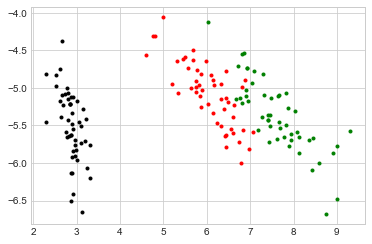

In [95]:
## 7.Plot the data in the 2-dimensional space given by the principal components. Make sure that samples with different labels have different colors in the plot.
n1=np.where(labels=='Iris-setosa')
n2=np.where(labels=='Iris-versicolor')
n3=np.where(labels=='Iris-virginica')

with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    plt.plot( proj[n1, 0],proj[n1, 1], '.',color='k')
    plt.plot( proj[n3, 0],proj[n3, 1],'.', color='g')
    plt.plot( proj[n2, 0],proj[n2, 1],'.', color='r')

    plt.show()

## PART TWO: Image Data Compression

In [96]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

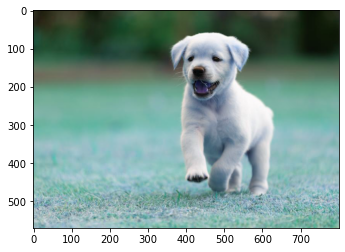

In [97]:
# read the image 
img = cv2.imread('puppy.jpeg') #you can use any image you want.
plt.imshow(img)

In [98]:
#The image is now represented as three 570x800 matrices as an array with each matrix corresponding to the RGB color value scheme.
# Structure
img.ndim
img.shape

(570, 800, 3)

In [99]:
# split the original image into Blue, Green and Red arrays
 
blue,green,red = cv2.split(img) 


Image reconstruction using 20 principal components


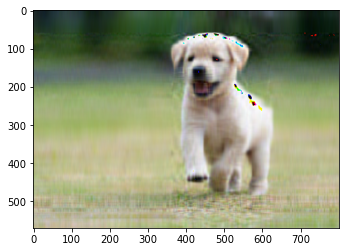

In [100]:
#initialize PCA with first 20 principal components
pca = PCA(20)

#Apply to red channel and then apply inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)

#Apply to Green channel and then apply inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)

#Apply to Blue channel and then apply inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

#compress the image 
img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)

#view the compressed image
print("Image reconstruction using 20 principal components")

plt.imshow(img_compressed)

Image reconstruction using 100 principal components


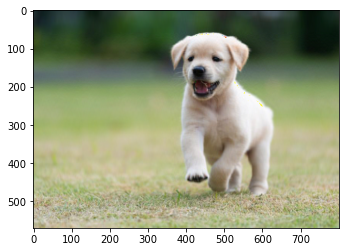

In [101]:
#initialize PCA with first 100 principal components
pca = PCA(100)
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)
img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)
print("Image reconstruction using 100 principal components")

plt.imshow(img_compressed)

Image reconstruction using 300 principal components


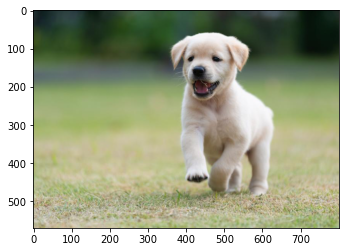

In [102]:
#initialize PCA with first 300 principal components
pca = PCA(300)
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)
img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)
print("Image reconstruction using 300 principal components")

plt.imshow(img_compressed)

### citation:
Smith, L. I. (2002, February 26). A tutorial on principal components analysis

Levi Santana de Lelis. (2021, March 28). CMPUT 304 lab4 material

Xavier. (2021, April 19).  Image compression using PCA Retrieved from https://www.kaggle.com/xvivancos/image-compression-using-pca/report